## Data Processing

#### Setup
 - Download JSON File
 - Install depedenices

In [ ]:
!pip install seaborn matplotlib tqdm
#these are preinstalled in colab btw

In [11]:
filename = 'lichess_db_standard_rated_2023-10.pgn.zst' #"lichess_db_standard_rated_2013-01.pgn.zst"
dataMonth = filename.split(".")[0].split("_")[-1]

#### Start Here!

### Resources
https://seaborn.pydata.org/tutorial/distributions.html


In [13]:
import os, json
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed
from random import randint

In [20]:
import os, json
def readJson(filename):
  with open(filename, 'r') as f:
    return json.load(f)

def writeJson(filename, data):
  with open(filename, 'w') as f:
    return json.dump(data, f)

Testing...
Showing Graph


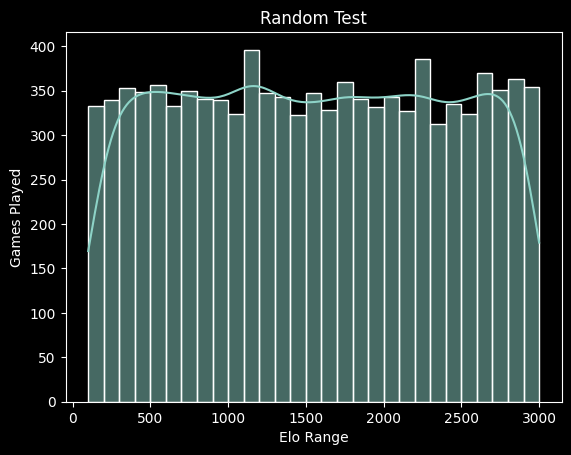

In [24]:
def doGraphThingy(title: str, data: list, folderName="graphThingy", show: bool = False):

  bins = [x for x in range(100, 3001, 100)] #https://github.com/numpy/numpy/issues/11879

  chart = sb.histplot(data, bins = bins, kde=True)
  
  chart.set(xlabel="Elo Range", ylabel="Games Played", title=title)
  #print(type(chart)   )

  figure = chart.get_figure()
  os.makedirs(folderName, exist_ok = True)
  figure.savefig(f'graphThingy/{title.replace(" ", "_")}.jpg')
  if show:
    print('Showing Graph')
    plt.show(figure)
  plt.close(figure)

print("Testing...")
doGraphThingy("Random Test", [randint(100, 3000) for x in range(10000)], show = True)

## MergedMode

 - 156 total categories
 - Loaded from multiple JSONs in the folder mergedOpenings


In [6]:
filelist = sorted(os.listdir('mergedOpenings_2023-10'))

In [9]:
def graphAFile(filename):
  chessOpening = filename.split('.')[0]
  eloList = readJson(f'mergedOpenings_{dataMonth}/{filename}')
  doGraphThingy(chessOpening, eloList, show=False)
  return chessOpening, len(eloList)

In [12]:
with ProcessPoolExecutor(max_workers=4) as executor:
  futures = [executor.submit(graphAFile, filename) for filename in filelist]

  for future in tqdm(as_completed(futures), total=len(filelist)):
    chessOpening, num_items = future.result()
    tqdm.write(f"{chessOpening}: {num_items} items.")

  0%|          | 0/156 [00:00<?, ?it/s]

Amar Opening: 24636 items.
Amar Gambit: 13 items.
Amazon Attack: 28255 items.
Amsterdam Attack: 187 items.
Australian Defense: 3047 items.
Barnes Opening: 12569 items.
Barnes Defense: 54967 items.
Anderssen's Opening: 75926 items.
Benko Gambit Accepted: 26789 items.
Benko Gambit Declined: 6259 items.
Benko Gambit: 32123 items.
Alekhine Defense: 907764 items.
Blackburne Shilling Gambit: 5526 items.
Blackmar Gambit: 68428 items.
Blackmar-Diemer Gambit Declined: 31999 items.
Blackmar-Diemer Gambit: 268189 items.
Blackmar-Diemer, Lemberger Countergambit: 1862 items.
Blumenfeld Countergambit Accepted: 415 items.
Blumenfeld Countergambit: 19872 items.
Bird Opening: 864394 items.
Bogo-Indian Defense: 26086 items.
Bongcloud Attack: 3751 items.
Borg Defense: 57756 items.
Borg Opening: 303 items.
Bronstein Gambit: 1516 items.
Benoni Defense: 1214724 items.
Canard Opening: 24181 items.
Carr Defense: 44210 items.
Catalan Opening: 83350 items.
Center Game Accepted: 12636 items.
Clemenz Opening: 606

## Plot All
 - These do not work (for now) due to memory limitations
 - Plotting manually after doing collections.counter works tho (see alphaPlot)

In [ ]:
eloList = readJson("openings_2023-10.json")

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import gc

In [ ]:
allElos = []
for key, values in eloList.items():
  allElos.extend(values)

print(len(allElos))
#doGraphThingy("All Elos", newList, show=True)

In [ ]:
def alphaPlot(allElos):
  countedStuff = Counter(allElos)
  plt.bar(countedStuff.keys(), countedStuff.values())
  plt.show()

alphaPlot(countedStuff)

In [ ]:
del eloList #tryina save some memory
gc.collect()

In [ ]:
doGraphThingy("All", allElos, show=True) #fails, out of memory.

In [ ]:
doGraphThingy("VeryBigRandomList", np.random.randint(400, 3001, size = int(10**8))) #also fails, so its not just our data.

In [ ]:
#trying individual ones, it does work.
eloList = readJson(f'mergedOpenings_{dataMonth}/Sicilian Defense.json')
doGraphThingy("Sicilian Defense", eloList, show=True)

In [ ]:
!zip graphThingy.zip -r graphThingy -9

## Unmerged Mode
 - 2980 total categories
 - Loaded from one JSON

In [ ]:
gamesDict = readJson(f'openings_{dataMonth}.json')

In [ ]:
for opening, eloList in tqdm(gamesDict.items()):
  doGraphThingy(opening, eloList)

In [ ]:
print("\n".join(gamesDict.keys()))